In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cách 1: Tạo ra một toán tử hàm

In [147]:
# y = w0 + w1x
def Model(w0, w1):
    def Compute(x):
        return w0 + w1*x
    return Compute

In [148]:
model1 = Model(1, 1)
x = np.array([1, 2, 3, 5])
y = model1(x)
print(y)

[2 3 4 6]


Cách 2: Tạo ra một lớp

In [149]:
class Model:
    def __init__(self, w0, w1):
        self.w0 = w0
        self.w1 = w1
    def __call__(self, x):
        return self.w0 + self.w1*x

In [150]:
model2 = Model(1, 2)
x = np.array([2, 3, 5])
y = model2(x)
print(y)

[ 5  7 11]


In [151]:
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 3, 5])
# design matrix
phi = pd.DataFrame({'x0': x ** 0, 'x1': x ** 1, 'x2' : x ** 2})
phi


,x0,x1,x2
0,1,1,1
1,1,2,4
2,1,3,9
3,1,4,16


In [152]:
PHI = np.array(phi.values)
w = np.linalg.inv(PHI.T @ PHI) @ PHI.T @ y
print(w)

[ 2.25 -0.35  0.25]


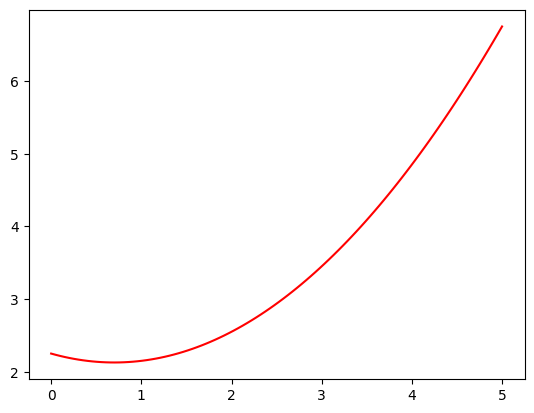

In [153]:
# visualize the model
x = np.linspace(0, 5, 100)
y = w[0] + w[1]*x + w[2]*x**2
plt.plot(x, y, 'r-')
plt.show()

In [154]:
# du lieu huan luyen ngau nhien
xs = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
ys = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
df = pd.DataFrame({'hour': xs, 'pass': ys})
df

,hour,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [155]:
def model_probability(w0, w1):
    def Compute(hour):
        return 1 / (1 + np.exp(-w0 - w1*hour))
    return Compute

def model_likelihood(w0, w1): # Niềm tin mô hình khớp như thế nào với dữ liệu, phải đầy đủ dữ liệu
    def Compute(hour, pass_):
        p = 1 / (1 + np.exp(-w0 - w1*hour))
        return np.where(pass_ == 1, p, 1-p)
        # if pass_ == 1: return p
        # else: return 1 - p
    return Compute

In [156]:
w0 = 1
w1 = 1
model1_probability = model_probability(w0, w1)
model1_likelihood = model_likelihood(w0, w1)
df['probability'] = model1_probability(df['hour'])
df['likelihood'] = model1_likelihood(df['hour'], df['pass'])
df

,hour,pass,probability,likelihood
0,0.50,0,0.817574,0.182426
1,0.75,0,0.851953,0.148047
2,1.00,0,0.880797,0.119203
3,1.25,0,0.904651,0.095349
4,1.50,0,0.924142,0.075858
5,1.75,0,0.939913,0.060087
6,1.75,1,0.939913,0.939913
7,2.00,0,0.952574,0.047426
8,2.25,1,0.962673,0.962673
9,2.50,0,0.970688,0.029312


Tính xác suất likelihood cho từng dữ liệu độc lập nhau. Vậy xác suất của một tập dữ liệu là tích của xác suất của từng dữ liệu độc lập nhau

Likelihood là độ đo xác suất của một dữ liệu độc lập nhau so với tập dữ liệu. Chúng ta phải tìm maximum likelihood để tìm ra phân phối xác suất phù hợp nhất cho tập dữ liệu.

In [157]:
likelihood1 = np.prod(df['likelihood'])
print(f'likelihood of model1 = {likelihood1}')

likelihood of model1 = 3.2734361741132603e-13


In [158]:
w0 = 0
w1 = 0.8
model1_probability = model_probability(w0, w1)
model1_likelihood = model_likelihood(w0, w1)
df['probability'] = model1_probability(df['hour'])
df['likelihood'] = model1_likelihood(df['hour'], df['pass'])
df

,hour,pass,probability,likelihood
0,0.50,0,0.598688,0.401312
1,0.75,0,0.645656,0.354344
2,1.00,0,0.689974,0.310026
3,1.25,0,0.731059,0.268941
4,1.50,0,0.768525,0.231475
5,1.75,0,0.802184,0.197816
6,1.75,1,0.802184,0.802184
7,2.00,0,0.832018,0.167982
8,2.25,1,0.858149,0.858149
9,2.50,0,0.880797,0.119203


In [159]:
likelihood2 = np.prod(df['likelihood'])
print(f'likelihood of model2 = {likelihood2}')

likelihood of model2 = 2.567875548455773e-08
